<a href="https://colab.research.google.com/github/MOHDANASAHMED/plantDiseasedetection/blob/main/plantdiseaes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)



100%|██████████| 2.70G/2.70G [00:21<00:00, 136MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [7]:

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob as gb
import cv2


In [8]:
train = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'


In [9]:
size = 224
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    train,
    target_size=(size, size),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle=True
)


Found 63282 images belonging to 38 classes.


In [10]:
train_generator.class_indices


{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

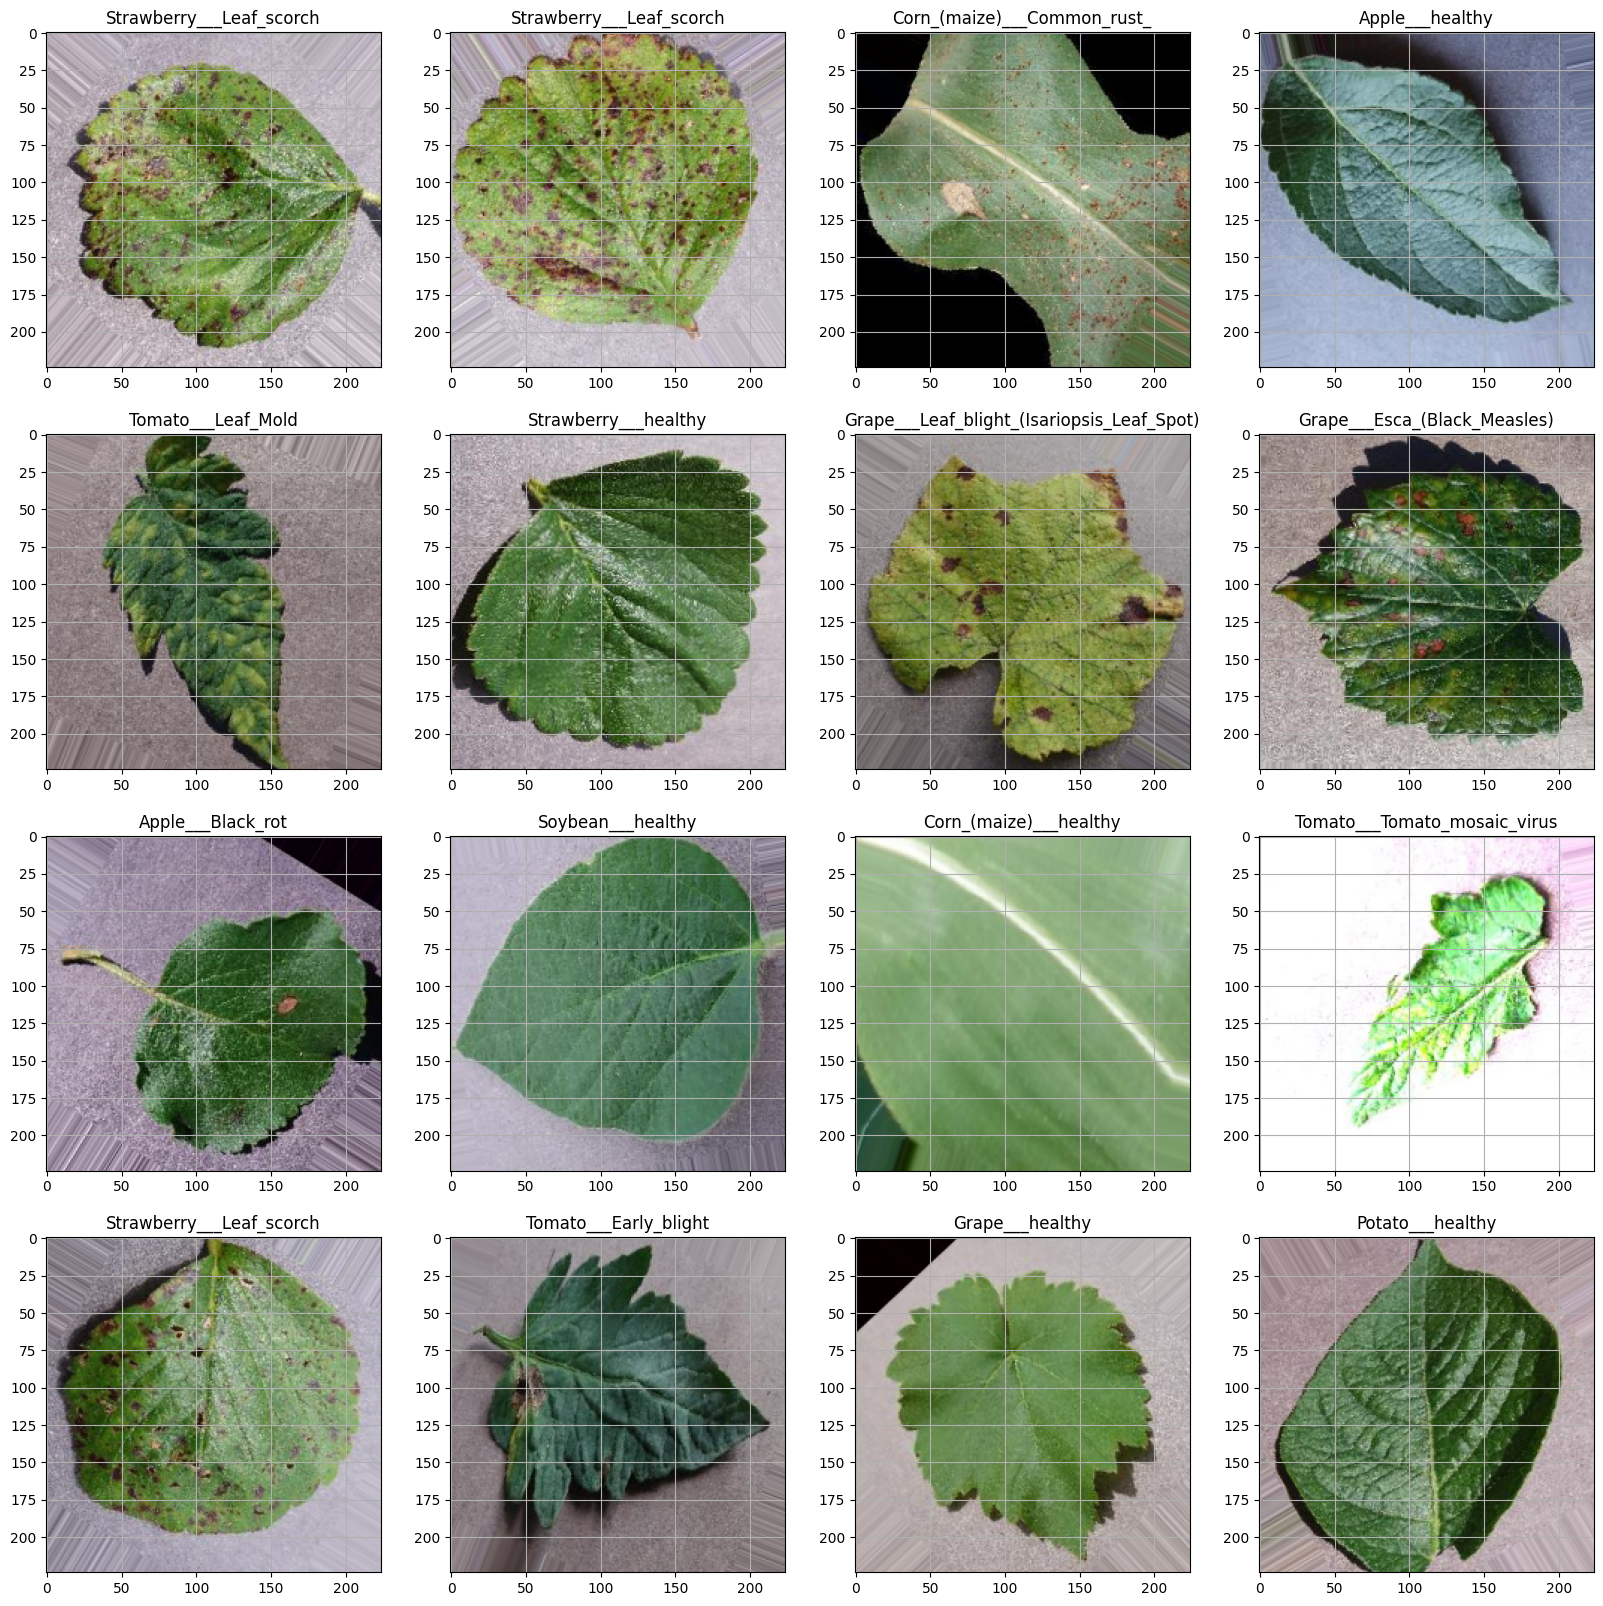

In [11]:
# Display some images
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
  for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_batch[i])
    plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    plt.grid(None)
  plt.show()
  break

In [12]:
valid = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'


In [13]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None,
    validation_split=0.1
).flow_from_directory(valid,
                      batch_size=32,
                      target_size=(size, size),
                      class_mode='categorical',
                      color_mode='rgb',
                      subset='validation',
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [14]:

test = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None
).flow_from_directory(test,
                      batch_size=32,
                      target_size=(224, 224),
                      color_mode='rgb',
                      class_mode = 'categorical',
                      shuffle = False)



Found 17572 images belonging to 38 classes.


In [15]:

test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [16]:

import tensorflow as tf
from tensorflow import keras

# Step 1: Define the Model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPool2D(pool_size=2),

    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),

    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(38, activation='softmax')  # Assuming 38 classes
])

# Step 2: Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

# Step 3: Print Model Summary
print(model.summary())



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,173,862 (42.62 MB)

 Trainable params: 11,173,862 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras',  monitor='val_loss', save_best_only=True)
model_ReduceLRonPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)
callbacks = [early_stopping, model_checkpoint, model_ReduceLRonPlateau]


In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall'])


In [28]:
history = model.fit(train_generator, epochs=5, validation_data=valid_generator, callbacks=callbacks)


Epoch 1/5
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 737s 372ms/step - accuracy: 0.6971 - loss: 0.9797 - precision: 0.8129 - recall: 0.5832 - val_accuracy: 0.7945 - val_loss: 0.6253 - val_precision: 0.8668 - val_recall: 0.7319 - learning_rate: 0.0010
Epoch 2/5
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 716s 362ms/step - accuracy: 0.7669 - loss: 0.7500 - precision: 0.8471 - recall: 0.6946 - val_accuracy: 0.8255 - val_loss: 0.5026 - val_precision: 0.8852 - val_recall: 0.7836 - learning_rate: 0.0010
Epoch 3/5
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 715s 362ms/step - accuracy: 0.7962 - loss: 0.6476 - precision: 0.8618 - recall: 0.7405 - val_accuracy: 0.8525 - val_loss: 0.4860 - val_precision: 0.8866 - val_recall: 0.8169 - learning_rate: 0.0010
Epoch 4/5
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 721s 365ms/step - accuracy: 0.8245 - loss: 0.5586 - precision: 0.8754 - recall: 0.7770 - val_accuracy: 0.8863 - val_loss: 0.3264 - val_precision: 0.9159 - val_recall: 0.8685 - learning_rate: 0.0010
Epoch 5/5
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 734

In [29]:
import seaborn as sns

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall = history.history['recall']
val_recall = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)


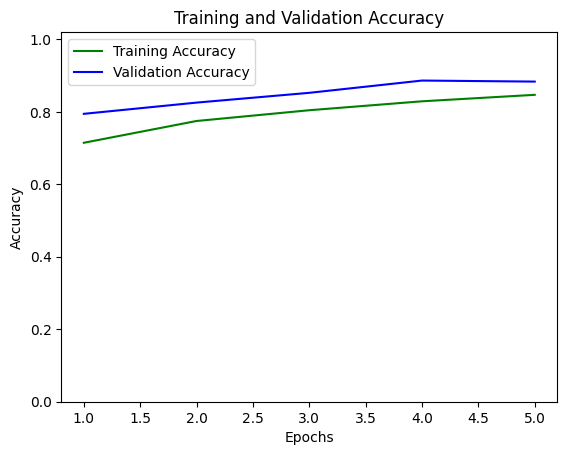

In [30]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1.02)
plt.show()

In [31]:
model_evaluate = model.evaluate(test_generator)
print("loss:", model_evaluate[0])
print("accuracy:", model_evaluate[1])
print("precision:", model_evaluate[2])
print("recall:", model_evaluate[3])

550/550 ━━━━━━━━━━━━━━━━━━━━ 30s 55ms/step - accuracy: 0.9115 - loss: 0.2622 - precision: 0.9323 - recall: 0.8932
loss: 0.2935198247432709
accuracy: 0.9012633562088013
precision: 0.9261302351951599
recall: 0.8790120482444763


In [32]:
# save the model
model.save('cnn_model.keras')